# Forecast Airlines Passengers data set. Prepare a document for each model explaining **how** many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting.

In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf
from statsmodels.tsa.seasonal import seasonal_decompose

In [41]:
from google.colab import files
uploaded = files.upload()

Saving Airlines+Data (1).xlsx to Airlines+Data (1) (1).xlsx


In [42]:
air = pd.read_excel("Airlines+Data (1).xlsx")
air

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
...,...,...
91,2002-08-01,405
92,2002-09-01,355
93,2002-10-01,306
94,2002-11-01,271


In [43]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [44]:
air.describe()

,Month,Passengers
count,96,96.000000
mean,1998-12-16 05:00:00,213.708333
min,1995-01-01 00:00:00,104.000000
25%,1996-12-24 06:00:00,156.000000
50%,1998-12-16 12:00:00,200.000000
75%,2000-12-08 18:00:00,264.750000
max,2002-12-01 00:00:00,413.000000
std,NaN,71.918216


# **Lineplot**

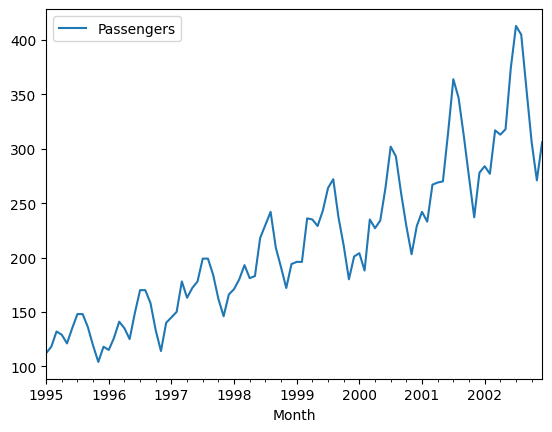

In [45]:
air1 = pd.read_excel("Airlines+Data (1).xlsx", header = 0, index_col = 0, parse_dates = True)
air1.plot()
plt.show()

In [46]:
air1.head()

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121


# Histogram & Density Plot

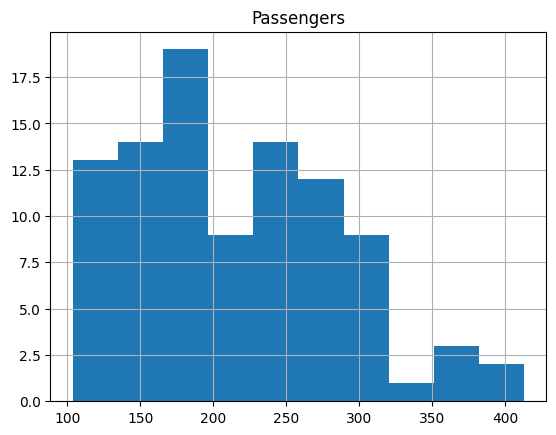

In [47]:
# Create a histogram plot
air1.hist()
plt.show()

<Axes: ylabel='Density'>

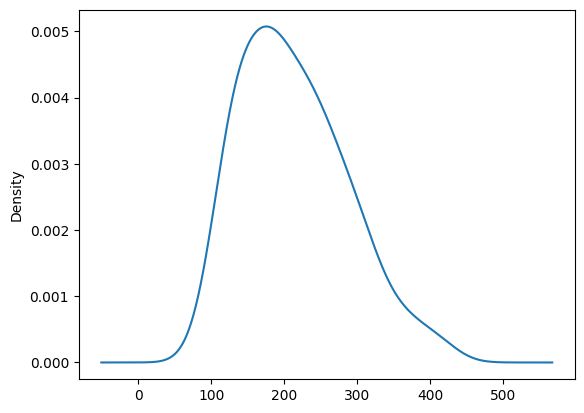

In [48]:
air1.Passengers.plot(kind = "kde")

# **Lag Plot**

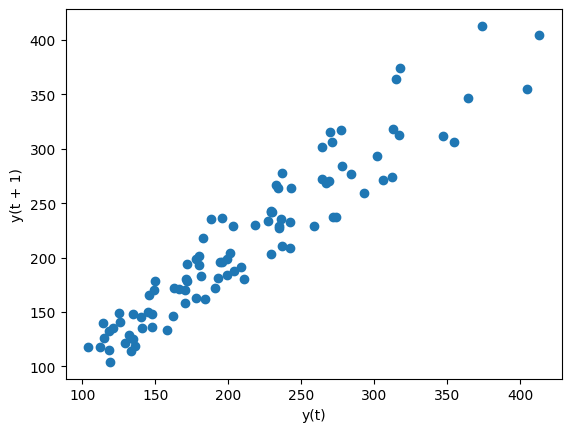

In [49]:
# Create a scatter plot

from pandas.plotting import lag_plot

lag_plot(air1)
plt.show()

# **ACF Plot**

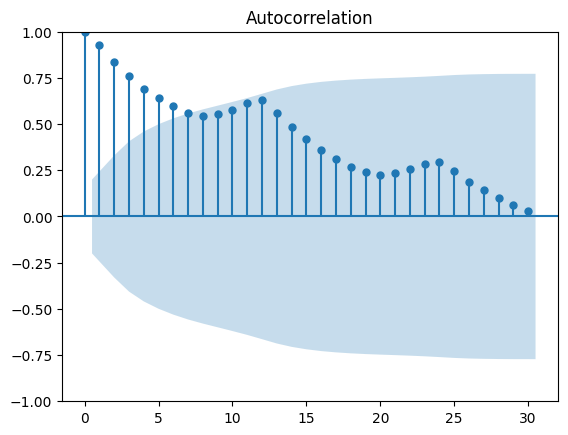

In [50]:
# create an autocorrealation plot

from statsmodels.graphics.tsaplots import plot_acf

plot_acf(air1, lags = 30)
plt.show()

# **Square Transformation**

# **Upsampling the data to each and every day**

In [51]:
upsampled = air1.resample("D").mean()
print(upsampled.head(32))

            Passengers
Month                 
1995-01-01       112.0
1995-01-02         NaN
1995-01-03         NaN
1995-01-04         NaN
1995-01-05         NaN
1995-01-06         NaN
1995-01-07         NaN
1995-01-08         NaN
1995-01-09         NaN
1995-01-10         NaN
1995-01-11         NaN
1995-01-12         NaN
1995-01-13         NaN
1995-01-14         NaN
1995-01-15         NaN
1995-01-16         NaN
1995-01-17         NaN
1995-01-18         NaN
1995-01-19         NaN
1995-01-20         NaN
1995-01-21         NaN
1995-01-22         NaN
1995-01-23         NaN
1995-01-24         NaN
1995-01-25         NaN
1995-01-26         NaN
1995-01-27         NaN
1995-01-28         NaN
1995-01-29         NaN
1995-01-30         NaN
1995-01-31         NaN
1995-02-01       118.0


            Passengers
Month                 
1995-01-01  112.000000
1995-01-02  112.193548
1995-01-03  112.387097
1995-01-04  112.580645
1995-01-05  112.774194
1995-01-06  112.967742
1995-01-07  113.161290
1995-01-08  113.354839
1995-01-09  113.548387
1995-01-10  113.741935
1995-01-11  113.935484
1995-01-12  114.129032
1995-01-13  114.322581
1995-01-14  114.516129
1995-01-15  114.709677
1995-01-16  114.903226
1995-01-17  115.096774
1995-01-18  115.290323
1995-01-19  115.483871
1995-01-20  115.677419
1995-01-21  115.870968
1995-01-22  116.064516
1995-01-23  116.258065
1995-01-24  116.451613
1995-01-25  116.645161
1995-01-26  116.838710
1995-01-27  117.032258
1995-01-28  117.225806
1995-01-29  117.419355
1995-01-30  117.612903
1995-01-31  117.806452
1995-02-01  118.000000


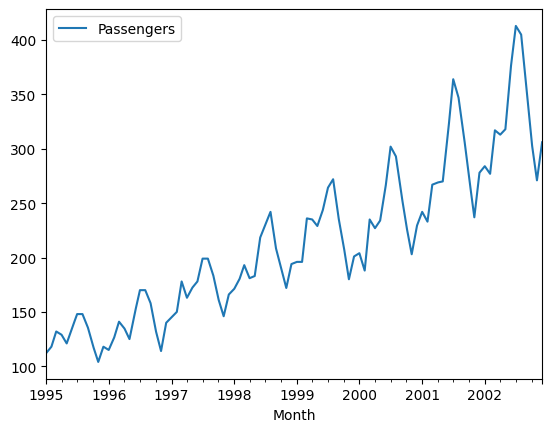

In [52]:
# Interpolate the missing value

interpolated = upsampled.interpolate(method = "linear")
print(interpolated.head(32))
interpolated.plot()
plt.show()

# **Before Transformation**

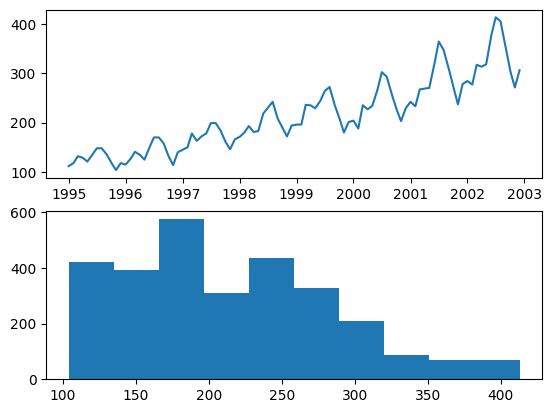

In [53]:
# Line plot
plt.subplot(211)
plt.plot(interpolated)

# Histogram
plt.subplot(212)
plt.hist(interpolated)
plt.show()

In [54]:
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


# **Square Root Transform**

In [55]:
dataframe = pd.DataFrame(interpolated)
dataframe.columns = ["Passengers"]
dataframe["Passengers"] = np.sqrt(dataframe["Passengers"])

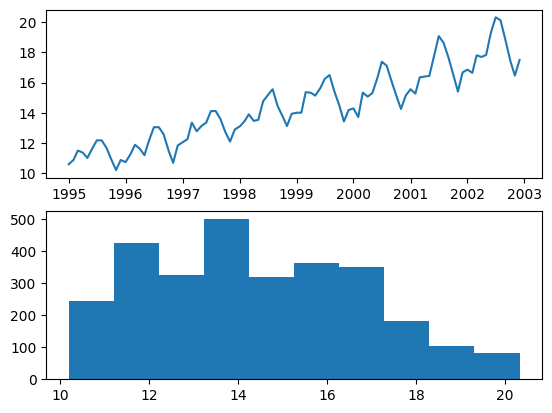

In [56]:
# Line Plot
plt.subplot(211)
plt.plot(dataframe["Passengers"])

# Histogram
plt.subplot(212)
plt.hist(dataframe["Passengers"])
plt.show()

In [57]:
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


# **Log Transform**

In [73]:
dataframe = pd.DataFrame(interpolated)
dataframe.columns = ["Passengers"]
dataframe["Passengers"] = np.log(dataframe["Passengers"])

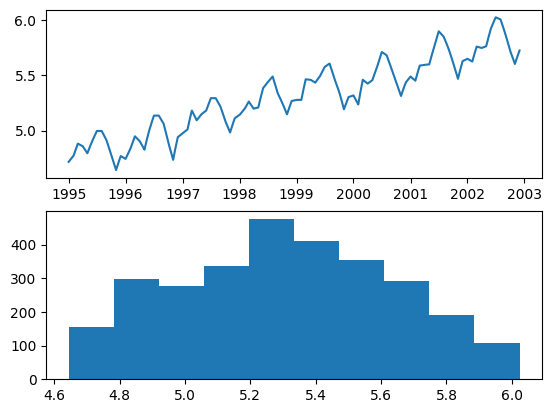

In [74]:
# Line Plot
plt.subplot(211)
plt.plot(dataframe["Passengers"])

# Histogram
plt.subplot(212)
plt.hist(dataframe["Passengers"])
plt.show()

In [75]:
interpolated

,Passengers
Month,
1995-01-01,112.000000
1995-01-02,112.193548
1995-01-03,112.387097
1995-01-04,112.580645
1995-01-05,112.774194
...,...
2002-11-27,301.333333
2002-11-28,302.500000
2002-11-29,303.666667


In [76]:
interpolated.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2892 entries, 1995-01-01 to 2002-12-01
Freq: D
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Passengers  2892 non-null   float64
dtypes: float64(1)
memory usage: 45.2 KB


In [62]:
air["Date"] = pd.to_datetime(air.Month, format = "%b - %y")
air["Months"] = air.Date.dt.strftime("%b")
air["Year"] = air.Date.dt.strftime("%Y")

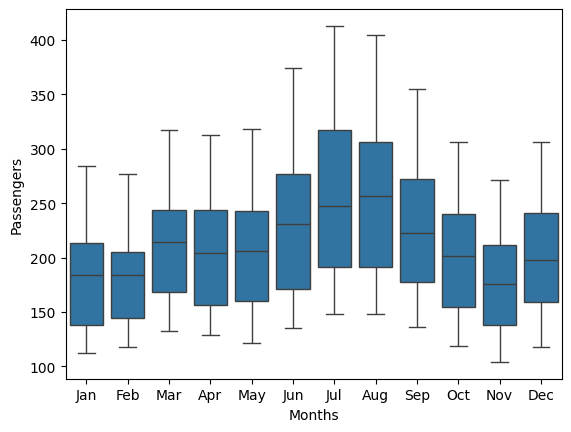

In [63]:
sns.boxplot(x = "Months", y = "Passengers", data = air);

<Axes: xlabel='Year', ylabel='Passengers'>

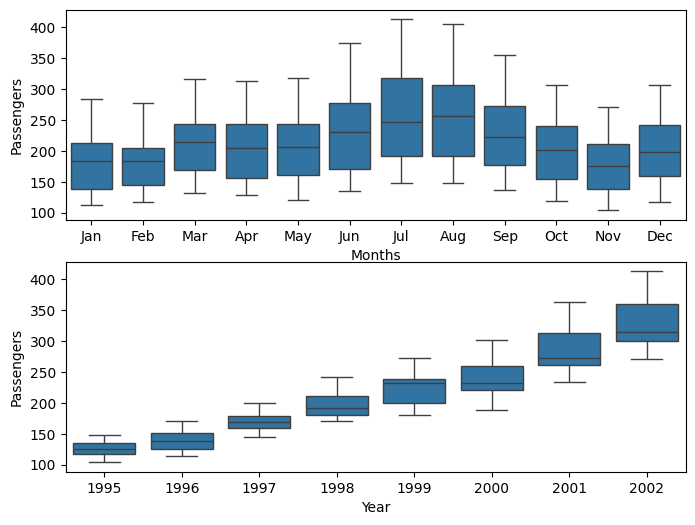

In [64]:
plt.figure(figsize = (8,6))
plt.subplot(211)
sns.boxplot(x = "Months", y = "Passengers", data = air)
plt.subplot(212)
sns.boxplot(x = "Year", y = "Passengers", data = air)

In [65]:
Month_Dummies = pd.DataFrame(pd.get_dummies(air["Months"]))
air = pd.concat([air, Month_Dummies], axis = 1)

In [66]:
len(air1)

96

In [77]:
print("Column Names:", air.columns)

Column Names: Index(['Month', 'Passengers', 'Date', 'Months', 'Year', 'Apr', 'Aug', 'Dec',
       'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep'],
      dtype='object')


In [78]:
air1["t"] = np.arange(1,97)
air1["t_squared"] = air1["t"] * air1["t"]
air1["Log_Passengers"] = np.log(air1["Passengers"])

In [79]:
air1

,Passengers,t,t_squared,Log_Passengers
Month,,,,
1995-01-01,112,1,1,4.718499
1995-02-01,118,2,4,4.770685
1995-03-01,132,3,9,4.882802
1995-04-01,129,4,16,4.859812
1995-05-01,121,5,25,4.795791
...,...,...,...,...
2002-08-01,405,92,8464,6.003887
2002-09-01,355,93,8649,5.872118
2002-10-01,306,94,8836,5.723585


# **Moving Average**

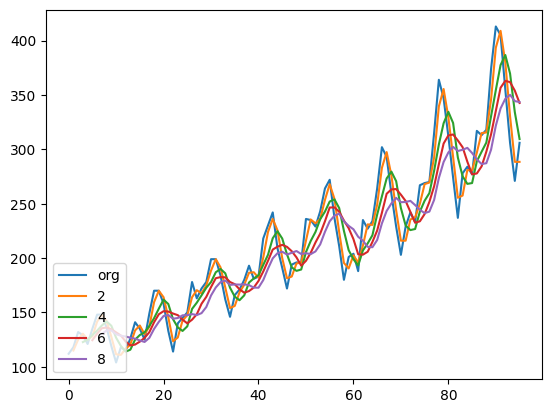

In [80]:
air.Passengers.plot(label = "org")
for i in range(2,10,2):
  air["Passengers"].rolling(i).mean().plot(label = str(i))
plt.legend(loc = 3)

<Axes: >

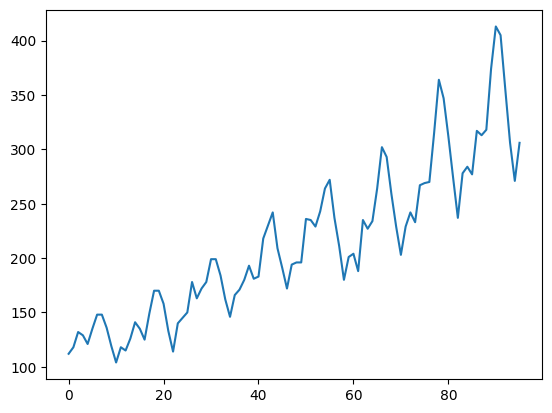

In [81]:
air.Passengers.plot()

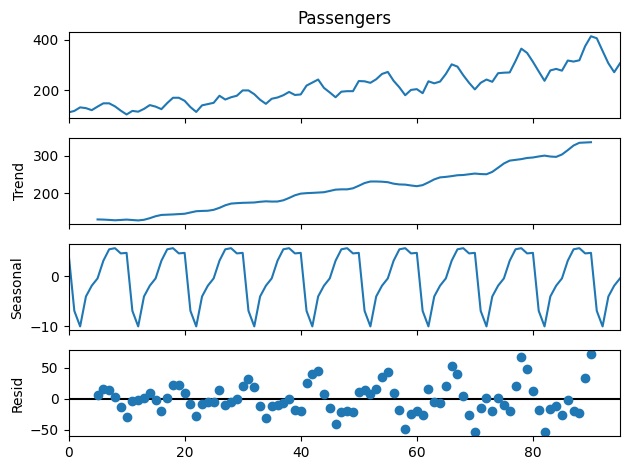

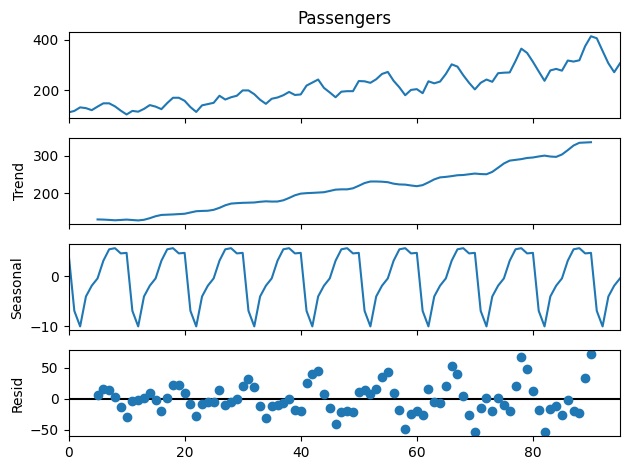

In [82]:
seasonal_ts_add = seasonal_decompose(air["Passengers"], period = 10)
seasonal_ts_add.plot()

In [83]:
# Splitting the data into train and test
Train = air1.head(80)
Test = air1.tail(16)

# **Building Model & RMSE Value**

In [84]:
# Linear Model
linear_model = smf.ols("Passengers~t", data = Train).fit()
pred_linear = pd.Series(linear_model.predict(pd.DataFrame(Test["t"])))
rmse_linear = np.sqrt(np.mean((np.array(Test["Passengers"])-np.array(pred_linear))**2))
rmse_linear

47.542624067726805

In [85]:
# Exponential Model
Exp = smf.ols("Log_Passengers~t", data = Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test["t"])))
rmse_Exp = np.sqrt(np.mean((np.array(Test["Passengers"]) - np.array(np.exp(pred_Exp)))**2))
rmse_Exp

43.79373939334308

In [86]:
# Quadratic Model
Quad = smf.ols("Passengers~t+t_squared", data = Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t", "t_squared"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test["Passengers"]) - np.array(pred_Quad))**2))
rmse_Quad

43.65440369584204

# **Testing**

In [87]:
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,RMSE_Values
0,rmse_linear,rmse_linear
1,rmse_Exp,rmse_Exp
2,rmse_Quad,rmse_Quad
3,rmse_add_sea,rmse_add_sea
4,rmse_add_sea_quad,rmse_add_sea_quad
5,rmse_Mult_sea,rmse_Mult_sea
6,rmse_Mult_add_sea,rmse_Mult_add_sea


# **Predict With New Data**

In [88]:
t = np.arange(97,108)
t

array([ 97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107])

In [89]:
t_squared = np.array(t*t)
t_squared

array([ 9409,  9604,  9801, 10000, 10201, 10404, 10609, 10816, 11025,
       11236, 11449])

In [90]:
Month = pd.DataFrame({"Month":['2003-01-01','2003-02-01','2003-03-01','2003-04-01','2003-05-01','2003-06-01','2003-07-01',
                               '2003-08-01','2003-09-01','2003-10-01','2003-10-01']})

In [91]:
df = {"t":t, "t_squared":t_squared}
df = pd.DataFrame(df)

In [92]:
newdata = pd.concat([Month, df], axis = 1)
newdata

,Month,t,t_squared
0,2003-01-01,97,9409
1,2003-02-01,98,9604
2,2003-03-01,99,9801
3,2003-04-01,100,10000
4,2003-05-01,101,10201
5,2003-06-01,102,10404
6,2003-07-01,103,10609
7,2003-08-01,104,10816
8,2003-09-01,105,11025
9,2003-10-01,106,11236


# **Building Model On Entire Dataset**

In [93]:
model_full = smf.ols("Passengers~t", data = air1).fit()
pred_new = pd.Series(model_full.predict(newdata))
pred_new

0     326.941886
1     329.276598
2     331.611311
3     333.946023
4     336.280736
5     338.615448
6     340.950161
7     343.284873
8     345.619585
9     347.954298
10    350.289010
dtype: float64

In [94]:
newdata["forecasted_passengers"] = pd.Series(pred_new)

In [95]:
newdata

,Month,t,t_squared,forecasted_passengers
0,2003-01-01,97,9409,326.941886
1,2003-02-01,98,9604,329.276598
2,2003-03-01,99,9801,331.611311
3,2003-04-01,100,10000,333.946023
4,2003-05-01,101,10201,336.280736
5,2003-06-01,102,10404,338.615448
6,2003-07-01,103,10609,340.950161
7,2003-08-01,104,10816,343.284873
8,2003-09-01,105,11025,345.619585
9,2003-10-01,106,11236,347.954298
